In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
df = pd.read_csv("Food_Delivery_Times.csv")

In [76]:
df.head(15)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
5,679,19.40,Clear,Low,Evening,Scooter,8,9.0,57
6,627,9.52,Clear,Low,NaN,Bike,12,1.0,49
7,514,17.39,Clear,Medium,Evening,Scooter,5,6.0,46
8,860,1.78,Snowy,Low,Evening,Car,20,6.0,35
9,137,10.62,Foggy,Low,Evening,Scooter,29,1.0,73


In [77]:
#Clear NaN values
df = df.dropna()

In [78]:
df.head(15)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
5,679,19.40,Clear,Low,Evening,Scooter,8,9.0,57
7,514,17.39,Clear,Medium,Evening,Scooter,5,6.0,46
8,860,1.78,Snowy,Low,Evening,Car,20,6.0,35
9,137,10.62,Foggy,Low,Evening,Scooter,29,1.0,73
10,812,16.86,Snowy,Medium,Afternoon,Car,13,4.0,88


In [79]:
#Apply One-hot Encoding
encoded_df = pd.get_dummies(df, columns=['Weather', 'Traffic_Level','Time_of_Day','Vehicle_Type'], drop_first=True)
encoded_df.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,738,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,741,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,661,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,412,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = encoded_df.drop(columns=["Order_ID","Delivery_Time_min"])
y = encoded_df["Delivery_Time_min"]

In [82]:
X.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,False,False,False,True,True,False,False,False,False,False,True
1,16.42,20,2.0,False,False,False,False,False,True,True,False,False,False,False
2,9.52,28,1.0,True,False,False,False,True,False,False,False,True,False,True
3,7.44,5,1.0,False,True,False,False,False,True,False,False,False,False,True
4,19.03,16,5.0,False,False,False,False,True,False,False,True,False,False,False


In [83]:
y.head()

,Delivery_Time_min
0,43
1,84
2,59
3,37
4,68


In [84]:
X.shape

(883, 14)

In [85]:
y.shape

(883,)

In [86]:
train_X, test_X,train_y,test_y = train_test_split(X,y, random_state=1,test_size=0.2)

In [87]:
train_X.shape

(706, 14)

In [88]:
test_X.shape

(177, 14)

In [89]:
train_y.shape

(706,)

In [90]:
test_y.shape

(177,)

In [91]:
train_X.describe()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs
count,706.000000,706.000000,706.000000
mean,10.017479,17.202550,4.689802
std,5.786881,7.210713,2.955237
min,0.600000,5.000000,0.000000
25%,4.930000,11.000000,2.000000
50%,10.250000,17.000000,5.000000
75%,15.135000,24.000000,7.000000
max,19.990000,29.000000,9.000000


In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
model = LinearRegression()

In [94]:
model.fit(train_X,train_y)

LinearRegression()

In [95]:
y_pred = model.predict(test_X)

In [96]:
y_pred.shape

(177,)

In [97]:
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
print("Mean Squared Error:", mean_squared_error(test_y, y_pred))
print("R² Score:", r2_score(test_y, y_pred))

Mean Squared Error: 64.06535350735817
R² Score: 0.822179964796458


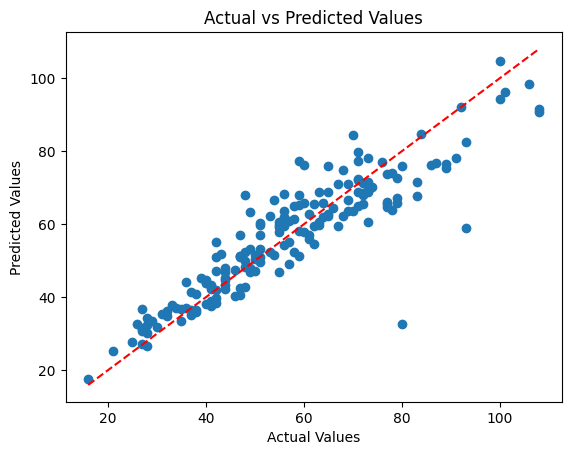

In [99]:

plt.scatter(test_y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Plot a diagonal line for perfect prediction
plt.plot([test_y.min(), test_y.max()],
         [test_y.min(), test_y.max()],
         'r--')  # red dashed line

plt.show()

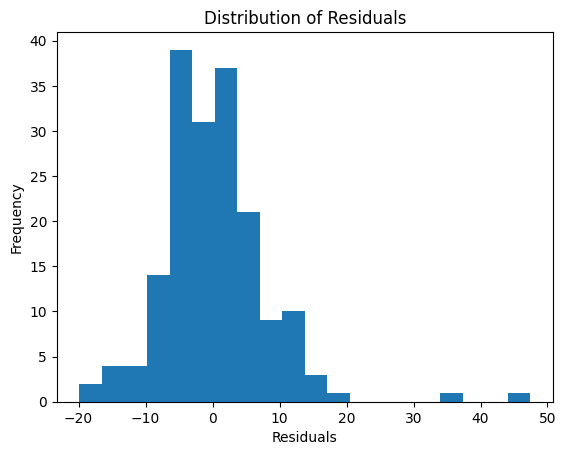

In [100]:
residuals = test_y - y_pred
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()